# Exercise 06 : Scatter Matrix
## Required data

In [1]:
%ls ../data/ab-test.csv
%ls ../data/checking-logs.sqlite

../data/ab-test.csv
../data/checking-logs.sqlite


## Imports

In [2]:
import pandas as pd
import sqlite3

## Load the AB-testing data

In [3]:
ab_testing_df = pd.read_csv('../data/ab-test.csv')
ab_testing_df = ab_testing_df[ab_testing_df['group'] == 'test']
ab_testing_df.drop(columns=['time', 'group'], inplace=True)
ab_testing_df.rename(columns={'diff': 'avg_diff'}, inplace=True)
ab_testing_df = ab_testing_df.groupby('uid').mean()
ab_testing_df

,avg_diff
uid,
user_1,-54.666667
user_18,-6.750000
user_19,-115.166667
user_21,-95.500000
user_25,-98.416667
user_28,-94.750000
user_3,-114.250000


## Load the data from `checker` and `pageviews`

In [4]:
db_connection = sqlite3.connect('../data/checking-logs.sqlite')

### Get checker commits

In [5]:
sql_query = """
SELECT
    uid,
    COUNT(timestamp) AS commits
FROM
    checker
WHERE
    checker.uid LIKE 'user_%'
    AND checker.labname != 'project1'
GROUP BY
    uid
"""

user_commits_count_df = pd.read_sql(sql_query, db_connection, index_col='uid')
user_commits_count_df

,commits
uid,
user_0,3
user_1,62
user_10,20
user_11,7
user_12,86
user_13,52
user_14,61
user_15,23
user_16,41


### Get pageviews commits

In [6]:
sql_query = """
SELECT
    uid,
    COUNT(datetime) AS pageviews
FROM
    pageviews
WHERE
    pageviews.uid LIKE 'user_%'
GROUP BY
    uid
"""

user_pageviews_count_df = pd.read_sql(sql_query, db_connection, index_col='uid')
user_pageviews_count_df

,pageviews
uid,
user_1,28
user_10,89
user_14,143
user_17,47
user_18,3
user_19,16
user_21,10
user_25,179
user_28,149


## Create general dataframe 

In [7]:
ab_testing_df.head()

,avg_diff
uid,
user_1,-54.666667
user_18,-6.750000
user_19,-115.166667
user_21,-95.500000
user_25,-98.416667


In [8]:
user_commits_count_df.head()

,commits
uid,
user_0,3
user_1,62
user_10,20
user_11,7
user_12,86


In [9]:
user_pageviews_count_df.head()

,pageviews
uid,
user_1,28
user_10,89
user_14,143
user_17,47
user_18,3


In [10]:
general_df = pd.concat([ab_testing_df, user_pageviews_count_df, user_commits_count_df], axis='columns', join='inner')
# general_df = pd.concat([ab_testing_df, general_df], axis='columns', join='outer')
general_df

,avg_diff,pageviews,commits
uid,,,
user_1,-54.666667,28,62
user_18,-6.750000,3,5
user_19,-115.166667,16,118
user_21,-95.500000,10,65
user_25,-98.416667,179,79
user_28,-94.750000,149,60
user_3,-114.250000,317,18


## Create a graph

In [11]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='avg_diff', ylabel='avg_diff'>,
        <AxesSubplot:xlabel='pageviews', ylabel='avg_diff'>,
        <AxesSubplot:xlabel='commits', ylabel='avg_diff'>],
       [<AxesSubplot:xlabel='avg_diff', ylabel='pageviews'>,
        <AxesSubplot:xlabel='pageviews', ylabel='pageviews'>,
        <AxesSubplot:xlabel='commits', ylabel='pageviews'>],
       [<AxesSubplot:xlabel='avg_diff', ylabel='commits'>,
        <AxesSubplot:xlabel='pageviews', ylabel='commits'>,
        <AxesSubplot:xlabel='commits', ylabel='commits'>]], dtype=object)

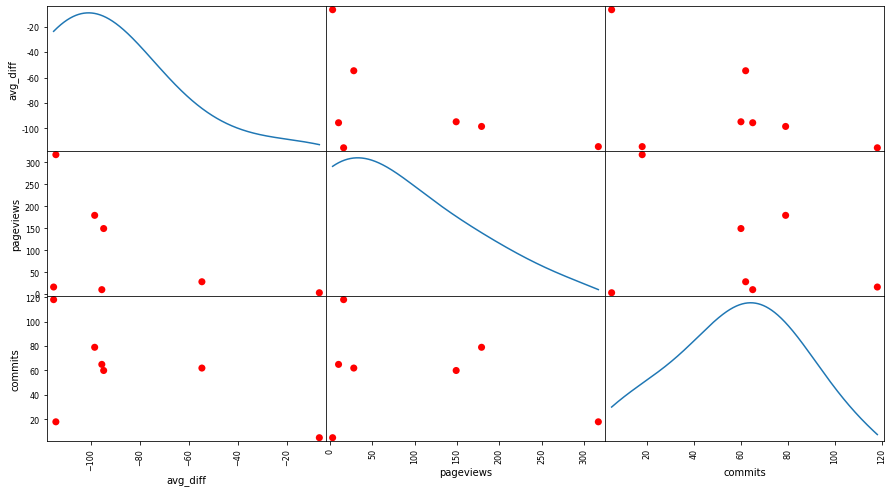

In [12]:
scatter_matrix(general_df, alpha=1, figsize = (15, 8), diagonal = 'kde', s=200, linewidth=3, color='red')

## Disconnect database

In [13]:
db_connection.close()

## Q/A
### Can we say that if a user has a low number of pageviews then they likely have a low number of commits?

The anwser is: no

### Can we say that if a user has a low number of pageviews then they likely have a small average difference between the first commit and the lab deadline?

The anwser is: no

### Can we say that there are many users with a low number of commits and a few with a high number of commits?

The anwser is: yes

### Can we say that there are many users with a small average difference and a few with a large average difference?

The anwser is: no